In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import date, datetime, timedelta

In [2]:
optimal_window = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Results/Optimal Perforamce per Window Sized.csv")

In [3]:
optimal_window.head()

,Unnamed: 0,RW=48,RW=24,RW=12
0,Linear Regression,6,0,0
1,Decision Tree,4,0,2
2,Random Forest,4,2,0
3,Gradient Boosting,6,0,0
4,KNN,3,0,3


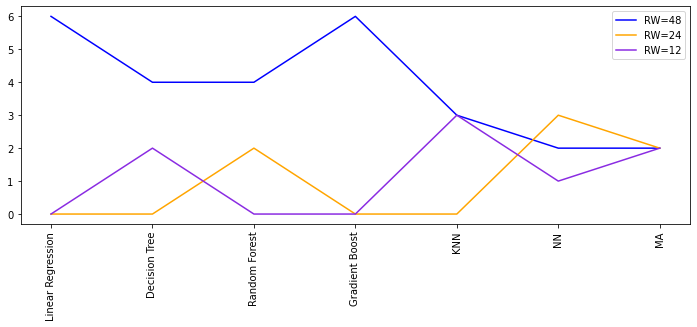

In [4]:
plt.figure(figsize=(12,4))
plt.plot(optimal_window["RW=48"], color="b", label="RW=48")
plt.plot(optimal_window["RW=24"], color="orange", label="RW=24")
plt.plot(optimal_window["RW=12"], color="blueviolet", label="RW=12")
plt.legend()
plt.xticks(range(0,7),[ 'Linear Regression','Decision Tree','Random Forest','Gradient Boost', 'KNN','NN', 'MA'], rotation=90)
plt.show()

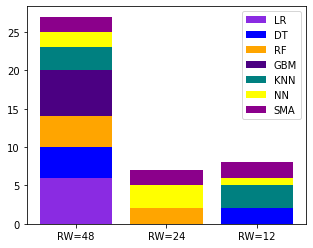

In [6]:
x = [1,2,3]
n=3
r = np.arange(n)
width = 0.25

plt.figure(figsize=(5,4))
plt.bar(x, optimal_window.iloc[0, 1:], label="LR", color="blueviolet")
plt.bar(x, optimal_window.iloc[1, 1:], bottom=optimal_window.iloc[0, 1:], label="DT", color="b")
plt.bar(x, optimal_window.iloc[2, 1:], bottom=optimal_window.iloc[0, 1:]+optimal_window.iloc[1, 1:], label="RF", color="orange")
plt.bar(x, optimal_window.iloc[3, 1:], bottom=optimal_window.iloc[0, 1:]+optimal_window.iloc[1, 1:]+optimal_window.iloc[2, 1:], label="GBM", color="indigo")
plt.bar(x, optimal_window.iloc[4, 1:], bottom=optimal_window.iloc[0, 1:]+optimal_window.iloc[1, 1:]+optimal_window.iloc[2, 1:]+optimal_window.iloc[3, 1:], label="KNN", color="teal")
plt.bar(x, optimal_window.iloc[5, 1:], bottom=optimal_window.iloc[0, 1:]+optimal_window.iloc[1, 1:]+optimal_window.iloc[2, 1:]+optimal_window.iloc[3, 1:]+optimal_window.iloc[4, 1:], label="NN", color="yellow")
plt.bar(x, optimal_window.iloc[6, 1:], bottom=optimal_window.iloc[0, 1:]+optimal_window.iloc[1, 1:]+optimal_window.iloc[2, 1:]+optimal_window.iloc[3, 1:]+optimal_window.iloc[4, 1:]+optimal_window.iloc[5, 1:], label="SMA", color="darkmagenta")
plt.legend(loc='best')
# plt.title("Count of Optimal RW Size Per Variable")
plt.xticks(x,[ 'RW=48','RW=24','RW=12'], rotation=0)
plt.show()

In [2]:
avg_cpu_results = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Results/avg_cpu_results.csv")
avg_cpu_results = avg_cpu_results.drop('Unnamed: 0', axis=1)

In [3]:
max_cpu_results = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Results/max_cpu_results.csv")
max_cpu_results = max_cpu_results.drop('Unnamed: 0', axis=1)

In [4]:
cc_cpu_results = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Results/corecount_results.csv")
cc_cpu_results = cc_cpu_results.drop('Unnamed: 0', axis=1)

In [5]:
memory_results = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Results/memory_results.csv")
memory_results = memory_results.drop('Unnamed: 0', axis=1)

In [6]:
avg_cpu_readings_results = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Results/avg_cpu_readings_results.csv")
avg_cpu_readings_results = avg_cpu_readings_results.drop('Unnamed: 0', axis=1)

In [7]:
max_cpu_readings_results = pd.read_csv("C:/Users/user/OneDrive - University College Cork/UCC/Year 4/FYP/Results/max_cpu_readings_results.csv")
max_cpu_readings_results = max_cpu_readings_results.drop('Unnamed: 0', axis=1)

In [28]:
max_cpu_readings_results.iloc[4, [1,3,5]]

MAE (w=48)    0.010541
MAE (w=24)    0.011097
MAE (w=12)    0.011819
Name: 4, dtype: object

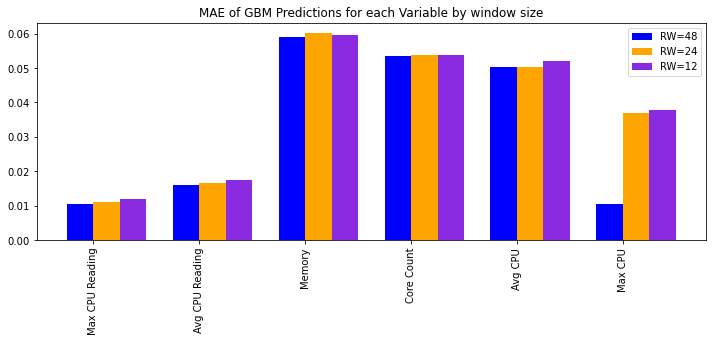

In [33]:
n=6
r = np.arange(n)
width=0.25
plt.figure(figsize=(12,4))
plt.bar(r,  [max_cpu_readings_results.iloc[4, 1], avg_cpu_readings_results.iloc[4, 1], memory_results.iloc[4, 1],
            cc_cpu_results.iloc[4, 1], max_cpu_results.iloc[4, 1], max_cpu_readings_results.iloc[4, 1]], 
        width=width, color="b", label="RW=48")
plt.bar(r+width,  [max_cpu_readings_results.iloc[4, 3], avg_cpu_readings_results.iloc[4, 3], memory_results.iloc[4, 3],
                  cc_cpu_results.iloc[4, 3], max_cpu_results.iloc[4, 3], avg_cpu_results.iloc[4, 3]],
        width=width, color="orange", label="RW=24")
plt.bar(r+width+width,  [max_cpu_readings_results.iloc[4, 5], avg_cpu_readings_results.iloc[4, 5], memory_results.iloc[4, 5],
                        cc_cpu_results.iloc[4, 5], max_cpu_results.iloc[4, 5], avg_cpu_results.iloc[4, 5]], 
        width=width, color="blueviolet", label="RW=12")
plt.xticks(r + width/2,['Max CPU Reading', 'Avg CPU Reading','Memory','Core Count','Avg CPU', 'Max CPU'], rotation=90)
plt.title("MAE of GBM Predictions for each Variable by window size")
plt.legend()
plt.show()

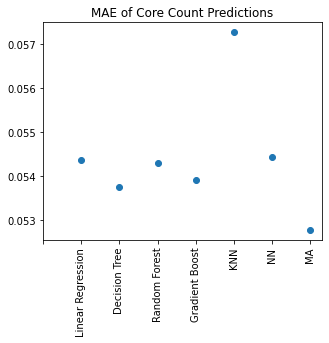

In [35]:
n=8
r = np.arange(n)
width = 0.25

plt.figure(figsize=(5,4))
# plt.bar(r, cc_cpu_results["RMSE (w=48)"], width=width, label="4 hours", color="blueviolet")
# plt.bar(r+width, cc_cpu_results["RMSE (w=24)"], width=width, label="2 hours", color="b")
plt.plot(cc_cpu_results.iloc[1:]["MAE (w=12)"], "o")
# plt.legend(loc='upper left')
plt.title("MAE of Core Count Predictions")
plt.xticks(r ,['', 'Linear Regression','Decision Tree','Random Forest','Gradient Boost', 'KNN','NN', 'MA'], rotation=90)
plt.show()